**PTB**

Pulmonary TB is a bacterial infection of the lungs that can cause a range of symptoms, including chest pain, breathlessness, and severe coughing. Pulmonary TB can be life-threatening if a person does not receive treatment. People with active TB can spread the bacteria through the air.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/heartbeat.zip" "/content/"

In [3]:
!unzip *.zip && rm -rf *.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


**EDA - Exploratory Data Analysis**

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
abnormal = pd.read_csv("ptbdb_abnormal.csv", header=None, index_col=False)
normal = pd.read_csv("ptbdb_normal.csv", header=None, index_col=False)

In [6]:
normal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,0.106564,0.106969,0.115883,0.122366,0.122366,0.119530,0.115883,0.122366,0.126013,0.133712,0.134927,0.142626,0.151135,0.158428,0.163695,0.173825,0.188817,0.207861,0.230956,0.258509,0.294571,0.325770,0.362642,0.398298,0.429498,0.449352,0.450972,0.418963,0.372771,0.310373,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,0.361781,0.362400,0.366110,0.367965,0.374150,0.377860,0.382189,0.384663,0.398887,0.401361,0.418058,0.443414,0.457638,0.487941,0.520717,0.559678,0.604205,0.634508,0.653680,0.672851,0.678417,0.660482,0.621521,0.555968,0.482375,0.438466,0.378479,0.351268,0.319728,0.306741,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,0.077342,0.087223,0.091993,0.095060,0.096422,0.104940,0.108007,0.113799,0.116525,0.119932,0.124361,0.132198,0.145826,0.152641,0.163543,0.175468,0.189438,0.204770,0.229302,0.252811,0.275980,0.302555,0.321295,0.333901,0.345826,0.348552,0.347189,0.334242,0.306644,0.274617,...,0.168313,0.170017,0.174106,0.178194,0.183646,0.186371,0.191141,0.194549,0.201704,0.208177,0.212266,0.219762,0.227598,0.238842,0.249063,0.254514,0.270187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,0.049059,0.051341,0.049344,0.045921,0.049914,0.053908,0.049629,0.045921,0.055048,0.053622,0.063605,0.066172,0.083286,0.094980,0.115801,0.131204,0.153166,0.178266,0.210211,0.232744,0.266115,0.286651,0.305762,0.317456,0.304906,0.264689,0.223902,0.191671,0.140901,0.111808,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,0.086931,0.094027,0.095801,0.096393,0.089592,0.094914,0.089592,0.094914,0.098167,0.102306,0.099645,0.096688,0.108516,0.127735,0.128326,0.149024,0.172383,0.204021,0.221762,0.254287,0.284743,0.309284,0.329687,0.344175,0.359846,0.333530,0.292135,0.253400,0.216736,0.171496,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
abnormal.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,0.649870,0.635100,0.655083,0.664639,0.633362,0.746308,0.871416,0.938314,1.000000,0.948740,0.396177,0.000000,0.039096,0.128584,0.305821,0.640313,0.617724,0.537793,0.352737,0.220678,0.256299,0.357950,0.482189,0.570808,0.577758,0.620330,0.622068,0.618593,0.626412,0.612511,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,0.125101,0.129136,0.137207,0.137207,0.132365,0.126715,0.158192,0.152542,0.132365,0.168684,0.156578,0.183212,0.191283,0.204197,0.230024,0.244552,0.285714,0.307506,0.321227,0.327684,0.351897,0.373688,0.397094,0.363196,0.340597,0.307506,0.258273,0.197740,0.199354,0.173527,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,0.681260,0.616743,0.624424,0.619816,0.596006,0.627496,0.631336,0.619048,0.612903,0.613671,0.607527,0.586790,0.568356,0.543779,0.526882,0.552995,0.577573,0.592166,0.576037,0.579109,0.573733,0.589862,0.542243,0.519201,0.514593,0.528418,0.493856,0.485407,0.461598,0.478495,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,0.357671,0.379852,0.375231,0.397412,0.388170,0.378004,0.398336,0.419593,0.427911,0.402033,0.378928,0.400185,0.406654,0.422366,0.402033,0.383549,0.398336,0.393715,0.417745,0.388170,0.360444,0.402957,0.392791,0.413124,0.377079,0.327172,0.346580,0.338262,0.356747,0.314233,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,0.285566,0.343718,0.281412,0.281412,0.283489,0.281412,0.319834,0.311526,0.283489,0.278297,0.274143,0.317757,0.267913,0.275182,0.280374,0.255452,0.313603,0.266874,0.244029,0.198339,0.192108,0.190031,0.134995,0.086189,0.078920,0.036345,0.024922,0.000000,0.044652,0.024922,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
labels = ["PTB Found", "PTB Not Found"]

In [9]:
# bell means normal
# distortion means disease

Text(0.5, 1.0, 'Normal')

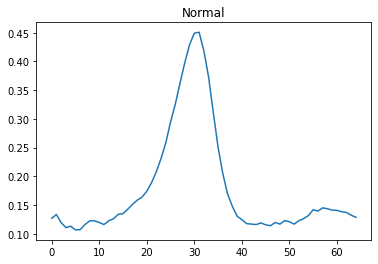

In [19]:
plt.plot((normal.values)[0][5:70])
plt.title("Normal")

Text(0.5, 1.0, 'Normal')

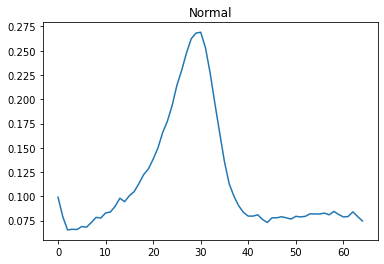

In [73]:
plt.plot((normal.values)[50][5:70])
plt.title("Normal")

Text(0.5, 1.0, 'PTB Disease')

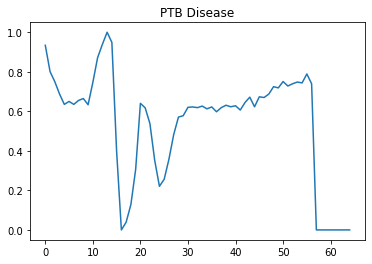

In [21]:
plt.plot((abnormal.values)[0][5:70])
plt.title("PTB Disease")

Text(0.5, 1.0, 'PTB Disease')

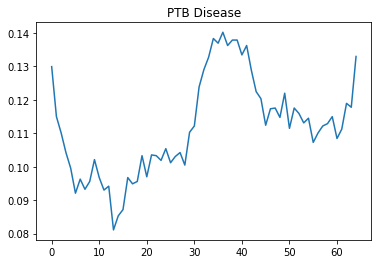

In [74]:
plt.plot((abnormal.values)[50][5:70])
plt.title("PTB Disease")

Text(0.5, 1.0, 'PTB Disease')

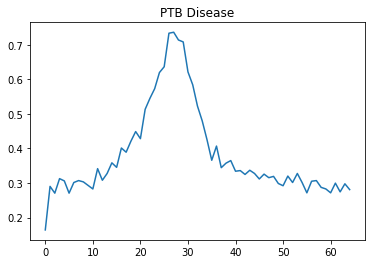

In [75]:
plt.plot((abnormal.values)[555][5:70])
plt.title("PTB Disease")

Text(0.5, 1.0, 'PTB')

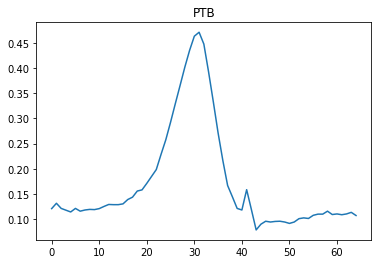

In [76]:
plt.plot((normal.values)[555][5:70])
plt.title("PTB")

In [22]:
normal.nunique()

0      1969
1      3882
2      3941
3      3527
4      3517
       ... 
183      19
184      10
185      10
186       1
187       1
Length: 188, dtype: int64

In [23]:
abnormal.nunique()

0       5041
1       9478
2      10131
3       9278
4       9731
       ...  
183       15
184        6
185        6
186        1
187        1
Length: 188, dtype: int64

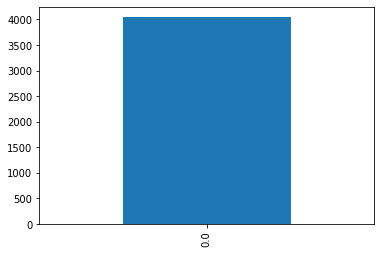

In [24]:
normal[187].value_counts().plot(kind="bar")

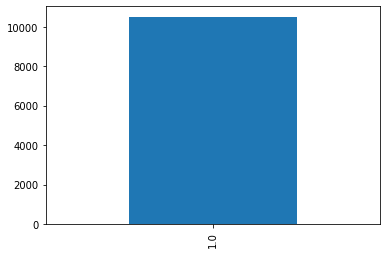

In [25]:
abnormal[187].value_counts().plot(kind="bar")

In [26]:
print("Normal Data has {} rows and {} columns.".format(normal.shape[0], normal.shape[1]))

Normal Data has 4046 rows and 188 columns.


In [27]:
print("Abnormal Data has {} rows and {} columns.".format(abnormal.shape[0], abnormal.shape[1]))

Abnormal Data has 10506 rows and 188 columns.


In [28]:
normal.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,...,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.000000,4046.0,4046.0
mean,0.979670,0.711486,0.311677,0.119575,0.088608,0.130843,0.159653,0.165608,0.168005,0.170783,0.173826,0.177106,0.180404,0.183969,0.187523,0.191656,0.196331,0.201717,0.208020,0.215299,0.223992,0.233837,0.245364,0.259296,0.274984,0.292412,0.310797,0.329714,0.347942,0.364635,0.377682,0.387177,0.389771,0.384719,0.372080,0.354507,0.333229,0.310046,0.287229,0.266094,...,0.045433,0.043975,0.038158,0.034412,0.032982,0.030434,0.027509,0.027461,0.023370,0.020179,0.018407,0.015547,0.012901,0.012950,0.010922,0.009013,0.008026,0.006308,0.005508,0.005689,0.004588,0.004104,0.003973,0.003677,0.003173,0.003131,0.002813,0.002949,0.002531,0.002151,0.001540,0.001332,0.001304,0.001220,0.000991,0.000894,0.000454,0.000474,0.0,0.0
std,0.029061,0.186376,0.183457,0.110457,0.075760,0.081104,0.090131,0.096094,0.102506,0.106190,0.108277,0.109754,0.111003,0.111700,0.112014,0.112331,0.113049,0.113602,0.114863,0.116146,0.118113,0.120586,0.123846,0.128308,0.133308,0.138738,0.143614,0.147384,0.149211,0.149230,0.147632,0.145558,0.141099,0.134807,0.129331,0.126980,0.127223,0.127964,0.127766,0.126593,...,0.121152,0.116627,0.106111,0.102581,0.101642,0.097343,0.095646,0.095851,0.085980,0.078521,0.077044,0.069744,0.061576,0.062845,0.058528,0.054904,0.050479,0.039301,0.036494,0.038420,0.032236,0.028780,0.027806,0.026556,0.024438,0.024573,0.023847,0.025002,0.023420,0.021821,0.018664,0.016234,0.016668,0.016658,0.015204,0.015311,0.010834,0.011202,0.0,0.0
min,0.782178,0.121784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002037,0.000000,0.006693,0.002468,0.012328,0.013736,0.010974,0.010288,0.024771,0.019342,0.041737,0.052935,0.000000,0.073295,0.049157,0.067416,0.092697,0.087079,0.074438,0.062364,0.044919,0.032272,0.034017,0.017763,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.964468,0.580160,0.164112,0.028731,0.027735,0.070776,0.094656,0.098848,0.095594,0.094988,0.096463,0.099133,0.101123,0.104586,0.107889,0.112171,0.117094,0.122897,0.128840,0.135913,0.143362,0.151232,0.160540,0.171103,0.183638,0.196871,0.211299,0.227493,0.244479,0.263042,0.281755,0.291071,0.291883,0.293444,0.278168,0.260980,0.236537,0.212314,0.188678,0.166567,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [29]:
abnormal.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
count,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,...,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.000000,10506.0,10506.0
mean,0.975468,0.725582,0.438306,0.290384,0.252897,0.249423,0.245668,0.247160,0.250203,0.252396,0.254995,0.256135,0.258874,0.262177,0.264312,0.267783,0.269925,0.272740,0.276093,0.278219,0.280492,0.282937,0.288788,0.297573,0.305875,0.315085,0.321783,0.327720,0.334027,0.338562,0.342270,0.342921,0.342933,0.341519,0.337099,0.332607,0.324926,0.317923,0.310351,0.302904,...,0.018173,0.018250,0.016898,0.016619,0.016967,0.016580,0.015275,0.015206,0.013824,0.012962,0.012549,0.011909,0.011081,0.011060,0.010554,0.009880,0.009385,0.009346,0.008661,0.008573,0.007957,0.007440,0.006092,0.004403,0.002912,0.002781,0.002293,0.001708,0.001621,0.001146,0.001055,0.001057,0.000744,0.000554,0.000533,0.000313,0.000070,0.000074,0.0,1.0
std,0.036354,0.199030,0.262699,0.270977,0.237004,0.211751,0.200159,0.194840,0.193160,0.192341,0.192528,0.192398,0.193686,0.196012,0.196639,0.198689,0.200735,0.200138,0.199651,0.199966,0.196450,0.195947,0.194375,0.194868,0.196947,0.199392,0.200614,0.201984,0.204881,0.208517,0.212062,0.215347,0.217277,0.217586,0.214832,0.209826,0.203582,0.198101,0.193661,0.190473,...,0.081199,0.081759,0.078315,0.078481,0.079824,0.080745,0.078109,0.077176,0.073327,0.072215,0.072142,0.069216,0.068081,0.067946,0.066905,0.065480,0.064688,0.065198,0.064276,0.064447,0.062392,0.060783,0.054416,0.045258,0.036144,0.035834,0.032595,0.027739,0.027490,0.022551,0.022312,0.022585,0.017557,0.013781,0.013553,0.010901,0.003754,0.004044,0.0,0.0
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0
25%,0.957325,0.586602,0.236455,0.074064,0.088487,0.101422,0.097175,0.096331,0.098527,0.098041,0.098290,0.098171,0.099483,0.102175,0.104648,0.107398,0.109674,0.113093,0.118388,0.120540,0.125236,0.129353,0.138470,0.147928,0.155781,0.163566,0.169470,0.173056,0.175735,0.177501,0.181357,0.183836,0.182255,0.179955,0.175485,0.171885,0.168396,0.165409,0.160283,0.154850,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Cleaning the Data

In [30]:
normal.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [31]:
abnormal.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [40]:
x_normal = normal.iloc[:, :-1].values
y_normal = normal.iloc[:, -1].values

In [41]:
x_abnormal = abnormal.iloc[:, :-1].values
y_abnormal = abnormal.iloc[:, -1].values

In [42]:
x = np.concatenate([x_normal, x_abnormal])
y = np.concatenate([y_normal, y_abnormal])

Spliting and Processing

In [43]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle

In [44]:
from sklearn.utils import shuffle
x, y = shuffle(x, y)

**SMOTE**

In [45]:
from collections import Counter
counter_before = Counter(y)
print(counter_before)

Counter({1.0: 10506, 0.0: 4046})


In [46]:
#applying SMOTE for imbalance
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_data, y_data = oversample.fit_resample(x, y)

In [47]:
from collections import Counter
counter_after = Counter(y_data)
print(counter_after)

Counter({1.0: 10506, 0.0: 10506})


In [48]:
labels = to_categorical(y_data).astype(int)

In [49]:
labels

array([[0, 1],
       [0, 1],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_data, labels, random_state=42, test_size=0.15)

In [51]:
X_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
X_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

In [52]:
print("X Train shape: ", x_train.shape)
print("X Test shape: ", x_test.shape)

X Train shape:  (17860, 187)
X Test shape:  (3152, 187)


**Model**

In [53]:
import tensorflow as tf

In [55]:
# Conv Layers

inp = tf.keras.layers.Input(shape=(x_train.shape[1],1))
u1 = tf.keras.layers.Conv1D(filters=32, kernel_size=(3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001))(inp)
u2 = tf.keras.layers.MaxPooling1D(pool_size=(2))(u1)
u3 = tf.keras.layers.Dropout(rate=0.2)(u2)
u4 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001))(u3)
u5 = tf.keras.layers.MaxPooling1D(pool_size=(2))(u4)
u6 = tf.keras.layers.Dropout(rate=0.2)(u5)
u7 = tf.keras.layers.Conv1D(filters=64, kernel_size=(3), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001))(u6)
u8 = tf.keras.layers.MaxPooling1D(pool_size=(2))(u7)
u9 = tf.keras.layers.Dropout(rate=0.2)(u8)

f = tf.keras.layers.Flatten()(u9)
l1 = tf.keras.layers.Dense(units=512)(f)
l2 = tf.keras.layers.LeakyReLU(alpha=0.001)(l1)
l3 = tf.keras.layers.BatchNormalization()(l2)
l4 = tf.keras.layers.Dense(units=256)(l3)
l5 = tf.keras.layers.LeakyReLU(alpha=0.001)(l4)
l6 = tf.keras.layers.BatchNormalization()(l5)
l7 = tf.keras.layers.Dense(units=128)(l6)
l8 = tf.keras.layers.LeakyReLU(alpha=0.001)(l7)
l9 = tf.keras.layers.BatchNormalization()(l8)
l10 = tf.keras.layers.Dense(units=2)(l9)
outputs = tf.keras.layers.Activation("softmax")(l10)

model = tf.keras.models.Model(inputs = [inp], outputs = [outputs])

In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 187, 1)]          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 187, 32)           128       
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 93, 32)           0         
 1D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 93, 32)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 93, 64)            6208      
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 46, 64)           0         
 1D)                                                       

In [59]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [60]:
BATCH = 64
EPOCHS = 30

In [61]:
history = model.fit(
  x_train, y_train,
  validation_data=(x_test ,y_test),
  epochs=EPOCHS,
  batch_size=BATCH
  # callbacks=callbacks
)

Epoch 1/30
280/280 [==============================] - 17s 10ms/step - loss: 0.4048 - accuracy: 0.8198 - val_loss: 0.5450 - val_accuracy: 0.6840
Epoch 2/30
280/280 [==============================] - 2s 8ms/step - loss: 0.2497 - accuracy: 0.8962 - val_loss: 0.2565 - val_accuracy: 0.8918
Epoch 3/30
280/280 [==============================] - 2s 8ms/step - loss: 0.1781 - accuracy: 0.9304 - val_loss: 0.5586 - val_accuracy: 0.8217
Epoch 4/30
280/280 [==============================] - 2s 8ms/step - loss: 0.1611 - accuracy: 0.9375 - val_loss: 0.0856 - val_accuracy: 0.9651
Epoch 5/30
280/280 [==============================] - 2s 8ms/step - loss: 0.1120 - accuracy: 0.9583 - val_loss: 0.1366 - val_accuracy: 0.9483
Epoch 6/30
280/280 [==============================] - 2s 8ms/step - loss: 0.0989 - accuracy: 0.9638 - val_loss: 0.0960 - val_accuracy: 0.9616
Epoch 7/30
280/280 [==============================] - 2s 8ms/step - loss: 0.0833 - accuracy: 0.9702 - val_loss: 0.1805 - val_accuracy: 0.9324
Epoc

In [62]:
loss, accuracy = model.evaluate(x_test, y_test)

99/99 [==============================] - 1s 7ms/step - loss: 0.0073 - accuracy: 0.9968


Text(0, 0.5, 'Accuracy')

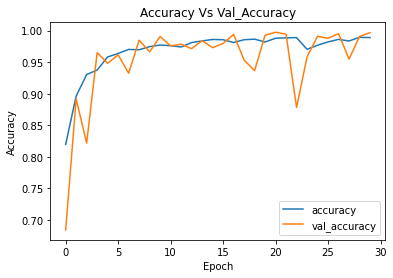

In [63]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

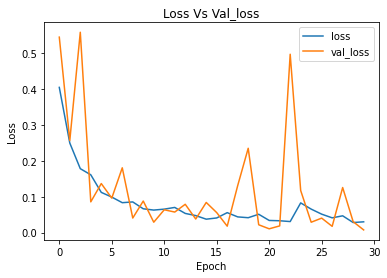

In [64]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.title('Loss Vs Val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

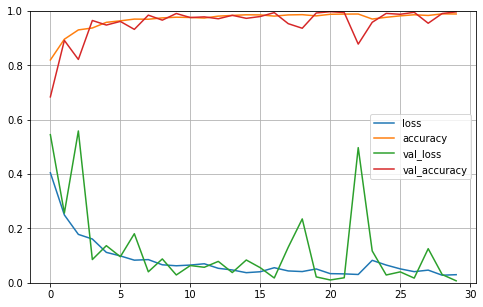

In [65]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [66]:
predictions = model.predict(x_test)

In [67]:
pred = np.argmax(predictions, axis=1)
# label
y_test = np.argmax(y_test, axis=1)

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1579
           1       1.00      1.00      1.00      1573

    accuracy                           1.00      3152
   macro avg       1.00      1.00      1.00      3152
weighted avg       1.00      1.00      1.00      3152



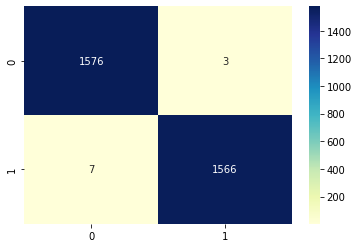

In [69]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm,  annot=True, fmt="d" ,cmap="YlGnBu")

In [70]:
from sklearn.metrics import classification_report
class_report=classification_report(y_test, pred)

In [71]:
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1579
           1       1.00      1.00      1.00      1573

    accuracy                           1.00      3152
   macro avg       1.00      1.00      1.00      3152
weighted avg       1.00      1.00      1.00      3152



In [72]:
model.save("model.hdf5")

Implemented By Muhammad Hanan Asghar